**THIS IS A SIMPLE CONVOLUTIONAL NEURAL NETWORK TO CLASSIFY DIGIT IMAGES IN** *MNIST DATASET*

>NAME : [QUSAY SELLAT](https://github.com/qusaysellat)

>THIS CODE IS ADOPTED FROM [Aymeric Damien](https://github.com/aymericdamien/TensorFlow-Examples/) EXAMPLES

>FOR MORE INFORMATION ABOUT 'MNIST' VISIT
[THIS SITE](http://yann.lecun.com/exdb/mnist/)

In [0]:
# first, lets import the libraries we are going to use

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# then, we load the MNIST dataset on which we are going to test our model

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/data/', one_hot = True)

W0905 17:42:20.435293 139944594470784 deprecation.py:323] From <ipython-input-2-12c236b23be9>:3: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0905 17:42:20.436976 139944594470784 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0905 17:42:20.438269 139944594470784 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instruction

Extracting /tmp/data/train-images-idx3-ubyte.gz


W0905 17:42:20.711831 139944594470784 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0905 17:42:20.714668 139944594470784 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0905 17:42:20.780472 139944594470784 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be remove

Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [3]:
# lets try to play with this data set

# lets see the dimensions of train, validation, and test datasets - note that mnist is a named tupple
print("dimensions of images and labels of training set")
print(mnist.train.images.shape)
print(mnist.train.labels.shape)

print("dimensions of images and labels of validation set")
print(mnist[1].images.shape)
print(mnist[1].labels.shape)

print("dimensions of images and labels of testing set")
print(getattr(mnist, 'test').images.shape)
print(getattr(mnist, 'test').labels.shape)

dimensions of images and labels of training set
(55000, 784)
(55000, 10)
dimensions of images and labels of validation set
(5000, 784)
(5000, 10)
dimensions of images and labels of testing set
(10000, 784)
(10000, 10)


In [4]:
# lets take a sample of our data and discover its values
print('the first 8 labels in the training set:')
print(mnist[0].labels[:8, : ])

the first 8 labels in the training set:
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


first 8 digits in the testing set:


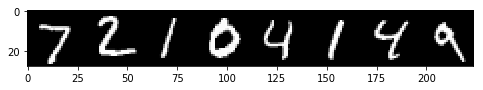

In [5]:
# now lets draw the sample we have just viewed

canvas = np.zeros((28, 28 * 8))
for i in range(8):
  canvas[:, 28 * i : 28 * (i + 1)] = mnist[2].images[i, :].reshape([28 ,28])
 
print("first 8 digits in the testing set:")
plt.figure(figsize = (8, 64))
plt.imshow(canvas, origin = 'upper', cmap ='gray')
plt.show()

In [0]:
# now lets define hyperparameters 

LR = 0.001
batch_size = 128
steps = 501
dropout = 0.8

# next we define network structure

I = 784 # number of pixels
O = 10 # number of classes

In [0]:
# lets define used placeholders

X = tf.placeholder(tf.float32, shape = (None, I))
Y = tf.placeholder(tf.float32, shape = (None, O))
d = tf.placeholder(tf.float32)

In [0]:
# lets define weights and biases of the network

Weights = {
    'conv_w_1' : tf.Variable(tf.random_normal([5, 5, 1, 32])),
    'conv_w_2' : tf.Variable(tf.random_normal([5, 5, 32, 64])),
    'conv_w_3' : tf.Variable(tf.random_normal([5, 5, 64, 128])),
    'conv_w_4' : tf.Variable(tf.random_normal([5, 5, 128, 256])),
    'fully_w_1' : tf.Variable(tf.random_normal([7*7*256, 1024])),
    'fully_w_2' : tf.Variable(tf.random_normal([1024, O]))
}

biases = {
    'conv_b_1' : tf.Variable(tf.random_normal([32])),
    'conv_b_2' : tf.Variable(tf.random_normal([64])),
    'conv_b_3' : tf.Variable(tf.random_normal([128])),
    'conv_b_4' : tf.Variable(tf.random_normal([256])),
    'fully_b_1' : tf.Variable(tf.random_normal([1024])),
    'fully_b_2' : tf.Variable(tf.random_normal([O]))
}

In [0]:
# now we will construct helping functions

# single convolutional operation
def conv_op(x, W, b, stride = 1) :
  x = tf.nn.conv2d(x, W, strides = [1, stride, stride, 1], padding = 'SAME' )
  x = tf.nn.bias_add(x, b)
  x = tf.nn.relu(x)
  return x

# single max pool operation
def maxpool_op(x, k = 2) :
  x = tf.nn.max_pool2d(x, ksize = [1, k, k, 1], strides = [1, k, k, 1], padding = 'SAME')
  return x

# model
def conv_model(x, Weights, biases, d, phase = 'TESTING') :
  
  # reshape x to appropriate size for convolutional operations
  x = tf.reshape(x, shape = [-1, 28, 28, 1])
  
  # first convolutional layer
  x = conv_op(x, Weights['conv_w_1'], biases['conv_b_1'])
  x = conv_op(x, Weights['conv_w_2'], biases['conv_b_2'])
  x = maxpool_op(x)
  
  # second convolutional layer
  x = conv_op(x, Weights['conv_w_3'], biases['conv_b_3'])
  x = conv_op(x, Weights['conv_w_4'], biases['conv_b_4'])
  x = maxpool_op(x)
  
  
  # fully connected layers
  
  # first fully connected layer
  x = tf.reshape(x, [-1, Weights['fully_w_1'].shape[0]])
  x = tf.add(tf.matmul(x, Weights['fully_w_1']), biases['fully_b_1'])
  x = tf.nn.relu(x)
  
  # perform dropout if in training phase
  if phase == 'TRAINING' :
    x = tf.nn.dropout(x, dropout)
  
  # second fully connected layer
  x = tf.add(tf.matmul(x, Weights['fully_w_2']), biases['fully_b_2'])
  
  return x

In [10]:
# now lets complete our model

# define logits and predictions
logits = conv_model(X, Weights, biases, d, phase = 'TRAINING')
preds = tf.nn.softmax(logits)

# define the loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = Y, logits = logits))

# define the optimizer
optimizer = tf.train.AdamOptimizer(LR).minimize(loss)

# find the accuracy
correct_eval = tf.equal(tf.arg_max(preds, 1), tf.arg_max(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_eval, tf.float32))

# these are for testing phase without dropout
logits_test = conv_model(X, Weights, biases, d, phase = 'TESTING')
preds_test = tf.nn.softmax(logits)
predictions_test = tf.arg_max(preds_test, 1)
correct_eval_test = tf.equal(tf.arg_max(preds_test, 1), tf.arg_max(Y, 1))
accuracy_test = tf.reduce_mean(tf.cast(correct_eval_test, tf.float32))

# tf initializer
init = tf.global_variables_initializer()

W0905 17:42:21.883111 139944594470784 deprecation.py:506] From <ipython-input-9-7bc5ee8c6ee7>:38: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0905 17:42:21.901213 139944594470784 deprecation.py:323] From <ipython-input-10-1dbafb0ddf11>:5: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

W0905 17:42:22.313032 139944594470784 deprecation.py:323] From <ipython-input-10-1dbafb0ddf11>:11: arg_max (from tensorflow.python.ops.gen_math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.math.argmax`

step 0 : loss : 132159392.0000, accuracy : 0.141
step 50 : loss : 9093258.0000, accuracy : 0.734
step 100 : loss : 3320704.5000, accuracy : 0.828
step 150 : loss : 2620054.7500, accuracy : 0.844
step 200 : loss : 1882227.5000, accuracy : 0.883
step 250 : loss : 1114626.6250, accuracy : 0.922
step 300 : loss : 807773.1250, accuracy : 0.961
step 350 : loss : 1501894.8750, accuracy : 0.914
step 400 : loss : 1048590.0000, accuracy : 0.945
step 450 : loss : 872497.1250, accuracy : 0.914
step 500 : loss : 921451.1875, accuracy : 0.922
training phase finished successfully !
 calculating accuracy on testing set ... 
the accuracy on the testing set is: 0.940
lets see how our model classifies first 8 images in the testing set: 


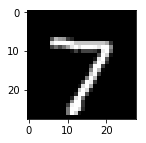

our algorithm predicted above digit as : 7


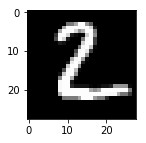

our algorithm predicted above digit as : 2


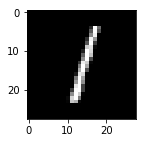

our algorithm predicted above digit as : 1


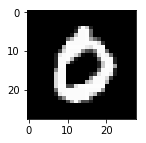

our algorithm predicted above digit as : 0


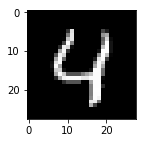

our algorithm predicted above digit as : 4


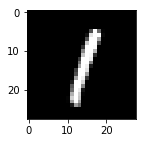

our algorithm predicted above digit as : 1


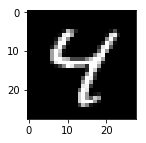

our algorithm predicted above digit as : 4


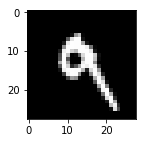

our algorithm predicted above digit as : 9


In [11]:
# lets train our model and see the results
with tf.Session() as sess :
  
  # run tf initializer
  sess.run(init)
  
  for i in range(steps) :
    
    # get next batch
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    
    # run optimizer
    _ = sess.run(optimizer, feed_dict = {X : batch_x, Y : batch_y, d : dropout})
    
    if i % 50 == 0 :
      
      # calculate current loss and accuracy
      l, a = sess.run([loss, accuracy], feed_dict = {X : batch_x, Y : batch_y, d : dropout})
      
      # print current loss and accuracy
      print('step ' + str(i) + " : " + "loss : " + "{:.4f}".format(l) + ", accuracy : " + "{:.3f}".format(a))
  
  print('training phase finished successfully !\n calculating accuracy on testing set ... ')
  a = sess.run(accuracy_test, feed_dict = {X : mnist.test.images, Y : mnist.test.labels, d : 0})
  print('the accuracy on the testing set is: ' + "{:.3f}".format(a))
  
  print('lets see how our model classifies first 8 images in the testing set: ')
  x8 = mnist.test.images[0:8, :]
  y8 = mnist.test.labels[0:8, :]
  
  predictions = sess.run(predictions_test, feed_dict = {X : x8, Y : y8, d : 0} )
  
  for i in range(8):
    
    plt.figure(figsize = (2, 2))
    plt.imshow(x8[i, : ].reshape([28, 28]), origin = 'upper', cmap = 'gray')
    plt.show()
    print('our algorithm predicted above digit as : ' + str(predictions[i]))